In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/Aishu/dl-model-extraction'

In [2]:
from attacker.query import *
from attacker.utils import *
from victim.__init__ import *

set_seed(42)

# Query victim model & Train attacker model

In [ ]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])
# initialize attacker model
model = get_model(config["attacker"], outputs)
# train attacker model
_ = training(model, trainloader, testloader)

save_visualize(None, _,'title' )

In [ ]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])

# query & save test data
querytestloader = query_victim(config["victim"], outputs, testloader, len(testloader.dataset), train=False)

# query train data
querytrainloader = query_victim(config["victim"], outputs, trainloader, config["query_size"], q_type=config["query_type"])

# initialize attacker model
attacker = get_model(config["attacker"], outputs)

# train attacker model
attacker_result = training(attacker, querytrainloader, querytestloader)

# save & visualize model inference
title = f'Trial-A_{config["attacker"]}_{config["victim"]["model_name"]}_{config["victim"]["data"]}{config["query_type"]}_{config["query_size"]}'
percent = save_visualize(attacker, attacker_result,title )
results_dict={"Victim":config["victim"]["model_name"],
                "Dataset":config["victim"]["data"],
                "QueryType": config["query_type"],
                "QuerySize": config["query_size"],
                "Queried Output": 'Labels',
                "Attacker": config["attacker"],
                "Train Loss": percent[0],
                "Train Accuracy": percent[1],
                "Test Loss": percent[2],
                "Test Accuracy": percent[3]}
print(results_dict)

# Parameters

In [3]:
# fine tune search for query size selection
parameters = {
        "query_size": [15000, 25000],
        "query_type": ['coreset','random'],
        "victim":[{ "data": CIFAR_10, "model_name": RESNET50}],
        "attacker":[RESNET34]
}

# Investigations

config={'batch_size': 500, 'learning_rate': 0.008, 'lr_cycles': 2, 'lr_steps': 1000, 'base_lr': 1e-05, 'max_lr': 0.1, 'query_size': 50000, 'query_type': 'coreset', 'victim': {'data': 'cifar_10', 'model_name': 'resnet50'}, 'attacker': 'resnet34'}

parameters={'query_size': [15000, 25000], 'query_type': ['coreset', 'random'], 'victim': [{'data': 'cifar_10', 'model_name': 'resnet50'}], 'attacker': ['resnet34']}

---------------------------------------------------------------------------
Files already downloaded and verified
Files already downloaded and verified
Query resnet50 victim on cifar_10 dataset
    - input:10000 queried:10000
Sample using None with query size 10000
    - input:10000 sampled:10000
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 15000-------------------
Query resnet50

    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.57090 test_loss  3.85252
epoch 76
    - train_acc 1.00000 train_loss 0.00003
    - test_acc  0.57160 test_loss  4.30025
epoch 77
    - train_acc 1.00000 train_loss 0.00003
    - test_acc  0.57100 test_loss  3.75669
epoch 78
    - train_acc 1.00000 train_loss 0.00010
    - test_acc  0.57220 test_loss  4.00383
epoch 79
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.57190 test_loss  4.11011
epoch 80
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.57190 test_loss  3.85351
epoch 81
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.57090 test_loss  4.04087
epoch 82
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.57160 test_loss  4.07329
epoch 83
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.57230 test_loss  4.09297
epoch 84
    - train_acc 1.00000 train_loss 0.00003
    - test_acc  0.57270 test_loss  4.12705
epoch 85
    - train_acc 1.00000 train_loss 0.00004
    - t

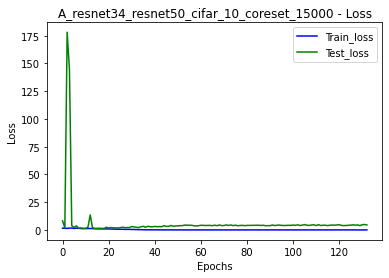

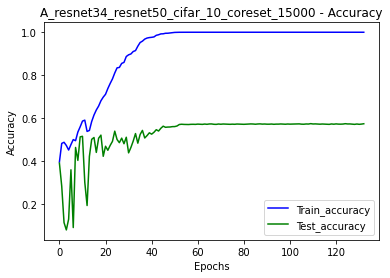

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 15000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 4.4787, 'Test Accuracy': 57.35}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 25000-------------------
Loading queried cifar_10 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 25000
    - input:50000 sampled:25000
Total epochs: 80
epoch 1
    - train_acc 0.42420 train_loss 1.42996
    - test_acc  0.44030 test_loss  1.98413
epoch 2
    - train_acc 0.48332 train_loss 2.21395
    - test_acc  0.07550 test_loss  149753.48438
epoch 3
    - train_acc 0.40116 train_loss 2.

    - test_acc  0.58370 test_loss  4.09885
epoch 80
    - train_acc 1.00000 train_loss 0.00003
    - test_acc  0.58410 test_loss  3.97024


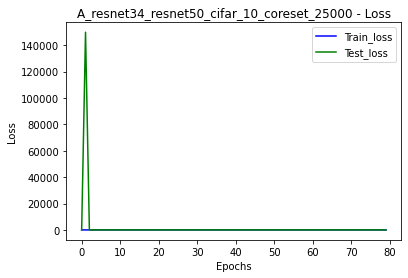

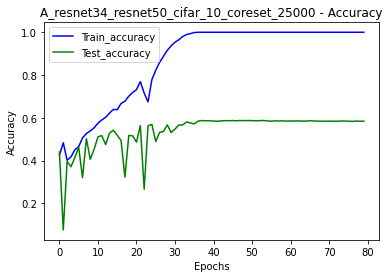

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 25000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 3.9702, 'Test Accuracy': 58.41}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 15000-------------------
Loading queried cifar_10 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 15000
    - input:50000 sampled:15000
Total epochs: 133
epoch 1
    - train_acc 0.42167 train_loss 1.57376
    - test_acc  0.16810 test_loss  12.09687
epoch 2
    - train_acc 0.48513 train_loss 1.48481
    - test_acc  0.34370 test_loss  2.91484
epoch 3
    - train_acc 0.48533 train_loss 1.64457

    - test_acc  0.55980 test_loss  3.96475
epoch 80
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.56090 test_loss  3.58658
epoch 81
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.56000 test_loss  4.22496
epoch 82
    - train_acc 1.00000 train_loss 0.00010
    - test_acc  0.56040 test_loss  4.32491
epoch 83
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.55980 test_loss  4.37901
epoch 84
    - train_acc 1.00000 train_loss 0.00008
    - test_acc  0.56010 test_loss  4.12239
epoch 85
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.55940 test_loss  4.48986
epoch 86
    - train_acc 1.00000 train_loss 0.00003
    - test_acc  0.56040 test_loss  4.12148
epoch 87
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.56130 test_loss  4.27228
epoch 88
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.55920 test_loss  4.48117
epoch 89
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.56020 test_loss  4.30414
epoch 9

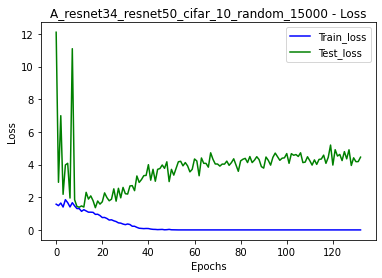

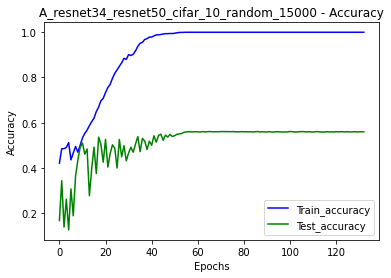

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'random', 'QuerySize': 15000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 4.4522, 'Test Accuracy': 55.97}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 25000-------------------
Loading queried cifar_10 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 25000
    - input:50000 sampled:25000
Total epochs: 80
epoch 1
    - train_acc 0.42564 train_loss 1.51313
    - test_acc  0.28450 test_loss  12.16183
epoch 2
    - train_acc 0.49284 train_loss 1.58311
    - test_acc  0.05120 test_loss  190.33940
epoch 3
    - train_acc 0.40252 train_loss 1.76798

    - test_acc  0.59590 test_loss  3.91275
epoch 80
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.59530 test_loss  4.61700


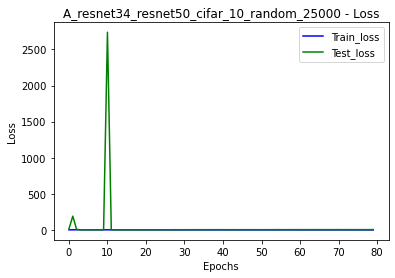

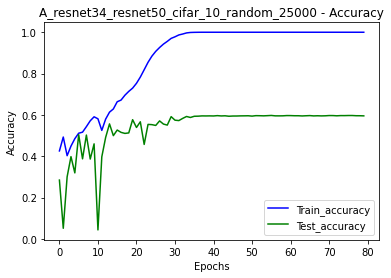

{'Victim': 'resnet50', 'Dataset': 'cifar_10', 'QueryType': 'random', 'QuerySize': 25000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 4.617, 'Test Accuracy': 59.53}
-----------------------------------------------------------------------------


In [4]:
print(f'config={config}\n\nparameters={parameters}\n')
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = get_dataloader(victim["data"])

    # query test data
    querytestloader = query_victim(victim, outputs, testloader, len(testloader.dataset), train=False)

    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = query_victim(victim, outputs, trainloader, size, q_type=querytype)

                # initialize attacker model
                attacker = get_model(attacker_type, outputs)

                # train attacker model
                attacker_result = training(attacker, querytrainloader, querytestloader)

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = save_visualize(attacker, attacker_result,title )
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Queried Output": 'Labels',
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')

In [5]:
Results

[{'Victim': 'resnet50',
  'Dataset': 'cifar_10',
  'QueryType': 'coreset',
  'QuerySize': 15000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 4.4787,
  'Test Accuracy': 57.35},
 {'Victim': 'resnet50',
  'Dataset': 'cifar_10',
  'QueryType': 'coreset',
  'QuerySize': 25000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 3.9702,
  'Test Accuracy': 58.41},
 {'Victim': 'resnet50',
  'Dataset': 'cifar_10',
  'QueryType': 'random',
  'QuerySize': 15000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 4.4522,
  'Test Accuracy': 55.97},
 {'Victim': 'resnet50',
  'Dataset': 'cifar_10',
  'QueryType': 'random',
  'QuerySize': 25000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 4.617,
  'Test Accuracy': 59.53}]